# **Exploratory Data Analysis Telco Customer Churn with Python**

1. Perform standard data cleansing
     - Missing values
     - Duplicated values
2. Perform standard EDA with rich interpretations!
    - Statistical summary of columns 
    - Univariate analysis 
    - Multivariate analysis 
3. Perform deep-dive exploration 

Dataset : https://www.kaggle.com/blastchar/telco-customer-churn

Target:

    Churn — Whether the customer churned or not (Yes, No)

Numeric Features:

    Tenure — Number of months the customer has been with the company
    MonthlyCharges — The monthly amount charged to the customer
    TotalCharges — The total amount charged to the customer

Categorical Features:

    CustomerID
    Gender — M/F
    SeniorCitizen — Whether the customer is a senior citizen or not (1, 0)
    Partner — Whether customer has a partner or not (Yes, No)
    Dependents — Whether customer has dependents or not (Yes, No)
    PhoneService — Whether the customer has a phone service or not (Yes, No)
    MulitpleLines — Whether the customer has multiple lines or not (Yes, No, No Phone Service)
    InternetService — Customer’s internet service type (DSL, Fiber Optic, None)
    OnlineSecurity — Whether the customer has Online Security add-on (Yes, No, No Internet Service)
    OnlineBackup — Whether the customer has Online Backup add-on (Yes, No, No Internet Service)
    DeviceProtection — Whether the customer has Device Protection add-on (Yes, No, No Internet Service)
    TechSupport — Whether the customer has Tech Support add-on (Yes, No, No Internet Service)
    StreamingTV — Whether the customer has streaming TV or not (Yes, No, No Internet Service)
    StreamingMovies — Whether the customer has streaming movies or not (Yes, No, No Internet Service)
    Contract — Term of the customer’s contract (Monthly, 1-Year, 2-Year)
    PaperlessBilling — Whether the customer has paperless billing or not (Yes, No)
    PaymentMethod — The customer’s payment method (E-Check, Mailed Check, Bank Transfer (Auto), Credit Card (Auto))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/My Drive/Colab Notebooks/Dataset/

/content/gdrive/My Drive/Colab Notebooks/Dataset


In [ ]:
df_telco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv') 

In [ ]:
# Showing top 5 rows of the data
df_telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#1. Perform standard data cleansing

##Missing values & Duplicated values


In [ ]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Check Na value
df_telco.isna().sum().sum()

0

In [ ]:
# Check column contains white space
Columns= df_telco.columns
for c in Columns :
  Count = df_telco[c][df_telco[c]==' '].count()
  if Count !=0:
    print (c, Count)

TotalCharges 11


1. Data contains 20 columns with 7043 rows
2. No na value
3. TotalCharges have missing values (11 rows white space), will be exlude later
4. TotalCharges is numeric, will be cange type to float later




In [ ]:
# exlude rows with TotalCharges column contains white space
df_telco = df_telco.loc[~df_telco['TotalCharges'].str.contains(' ')]

# transform TotalCharges col to float
df_telco['TotalCharges'] = df_telco['TotalCharges'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
#Print number of rows in DF
print(f"Rows: {df_telco.shape[0]} \n")
#Print number of features in DF
print(f"Features: {df_telco.shape[1]} \n")
#Print total number of missing values
print(f"Missing Values: {df_telco.isnull().values.sum()} \n")
#Print number of unique values per feature location
print(f"Unique Values: {df_telco.nunique()} \n")

Rows: 7032 

Features: 21 

Missing Values: 0 

Unique Values: customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64 



In [ ]:
# SeniorCitizen is categorical features
df_telco["SeniorCitizen"] = df_telco["SeniorCitizen"].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#group column names based on numeric type
numeric_features = df_telco.select_dtypes(include=[np.number])
print( 'numeric columns: ',numeric_features.columns)

numeric columns:  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [ ]:
#group column names based on categoric type
categoric_features = df_telco.select_dtypes(exclude=[np.number])
print('categoric columns: ',categoric_features.columns)

categoric columns:  Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')




> Now we have 7032 rows (each representing a unique customer) with 21 columns: 19 features, 1 target feature (Churn)




> No Duplicate data





> tenure, MonthlyCharges and TotalCharges are column numeric





> customerID, gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup',DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Churn and grouped_tenure are column categoric 



###Target : Churn

In [ ]:
def plot_target_dist(df):
    sns.set(style = 'whitegrid')
    sns.set_context('paper', font_scale = 2)
    fig = plt.figure(figsize = (13, 8))
    plt.subplot(121)
    plt.pie(df.Churn.value_counts(),labels = ['No Churn', 'Churn'], autopct = '%.1f%%', radius = 1, textprops={'fontsize': 20, 'fontweight': 'bold'})
    plt.title('Churn Outcome Pie Chart', fontsize = 30, fontweight = 'bold')
    plt.subplot(122)
    t = sns.countplot(df.Churn)
    t.set_xlabel('Churn', fontweight = 'bold', fontsize = 20)
    t.set_ylabel('Count', fontweight = 'bold', fontsize = 20)
    plt.title('Churn Outcome Distributions', fontsize = 30, fontweight = 'bold')
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


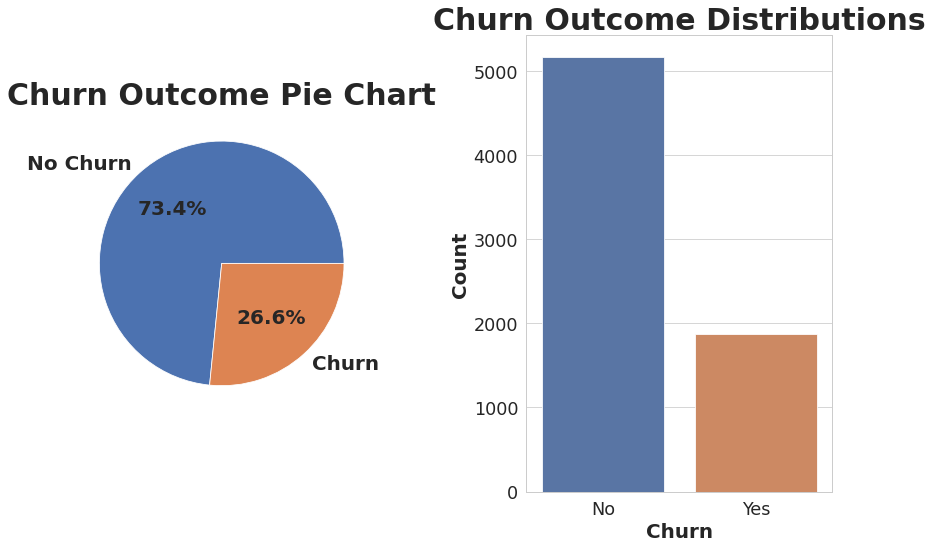

In [ ]:
plot_target_dist(df_telco)




#2. Perform standard EDA with rich interpretations!





##Statistical summary of columns

In [ ]:
# numerical statistical sumary
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


*   Overall, the minimum and maximum values make sense for each column

*   Mean > 50% (Median) in tenure and Totalcharges column, indicating both are slight positively skewed distribution

*   Mean < 50% (Median) in MonthlyCharges column, indicating slight negatively skewed distribution




In [ ]:
# categorical statistical sumary
categoric_features.describe().T

,count,unique,top,freq
customerID,7032,7032,7590-VHVEG,1
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087


In [ ]:
# showing the precise value counts
for col in categoric_features:
  print(f"Value counts of {col} column")
  print(df_telco[col].value_counts(), '\n')

Value counts of customerID column
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: int64 

Value counts of gender column
Male      3549
Female    3483
Name: gender, dtype: int64 

Value counts of SeniorCitizen column
0    5890
1    1142
Name: SeniorCitizen, dtype: int64 

Value counts of Partner column
No     3639
Yes    3393
Name: Partner, dtype: int64 

Value counts of Dependents column
No     4933
Yes    2099
Name: Dependents, dtype: int64 

Value counts of PhoneService column
Yes    6352
No      680
Name: PhoneService, dtype: int64 

Value counts of MultipleLines column
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

Value counts of InternetService column
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

Value

1.   Churn have 2 unique value, 'yes', and 'no'

2.   gender have 2 unique value, 'Male', and 'Female'

3.   InternetService have 3 unique value, 'Fiber optic','DSL' and 'No'

4.   Contract have 3 unique value, 'Month-to-month', 'Two year' and 'One year'

5.   PaymentMethod have 4 unique value, 'Electronic check','Mailed check' ,'Bank transfer (automatic)' and 'Credit card (automatic)'





##Univariate analysis


###Boxplot to detect outliers

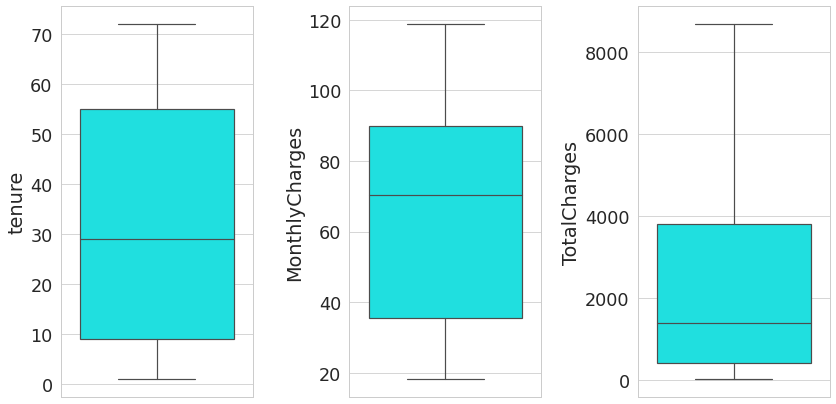

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numeric_features.columns
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_telco[features[i]], color='cyan')
    plt.tight_layout()



> No Outliers



###KDE plot for knowing the distribution form

In [ ]:
def plot_kde(df, feature):
    plt.figure(figsize = (15, 5))
    plt.title(f"KDE Plot: {feature}", fontsize = 30, fontweight = 'bold')
    sns.kdeplot(data=df, x=feature, hue="Churn")
    if feature == 'tenure':
        plt.xlabel('Tenure Length (Months)', fontsize = 20, fontweight = 'bold')
    else:
        plt.xlabel('Charge Amount ($)', fontsize = 20, fontweight = 'bold')
    plt.tight_layout()

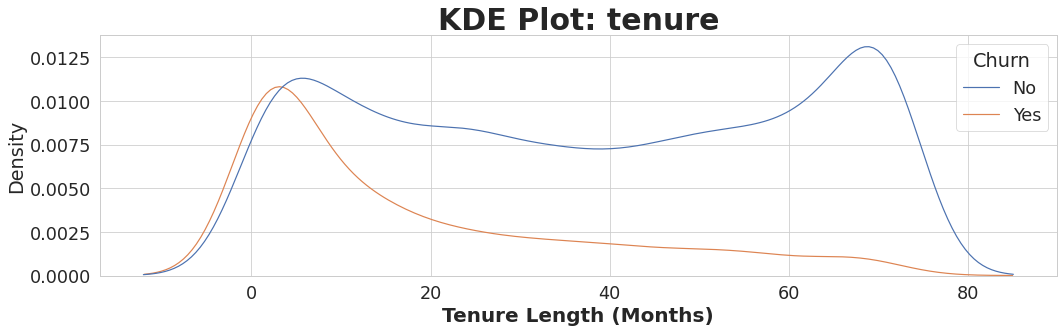

In [ ]:
plot_kde(df_telco, 'tenure')

1.   Customers are significanly more likely to churn within the first year of tenure on the platform
1.   As tenure increases, probability of churn decreases

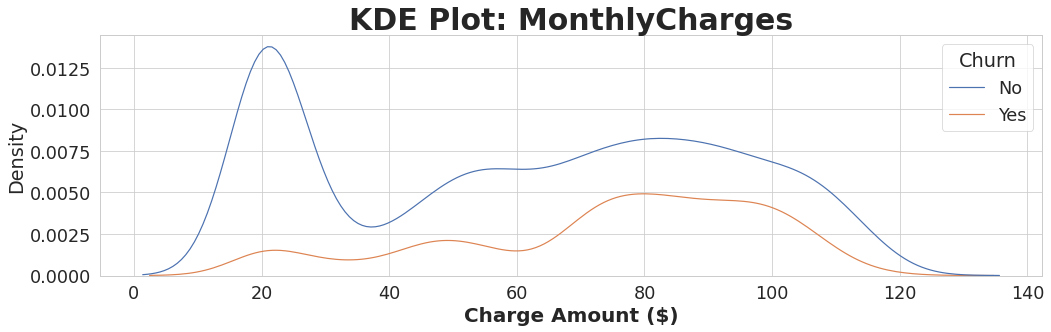

In [ ]:
plot_kde(df_telco, 'MonthlyCharges')

1.   As monthly charges increase, the probability of customer churn increases
1.   Customers who churn are most likely to have bills exceeding $60

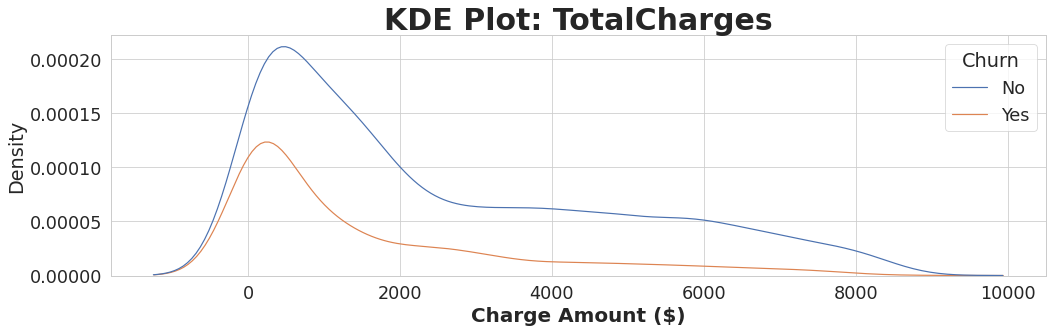

In [ ]:
plot_kde(df_telco, 'TotalCharges')


> Total Charges: Distributions mostly too general for impact of feature

##Multivariate analysis

###Numeric Features

######function plot Categorical Features

In [ ]:
def tenure_groups(df):
    if df.tenure <= 12:
        return "less_than_1"
    elif (df.tenure > 12) & (df.tenure <= 24):
        return "less_than_2"
    elif (df.tenure > 24) & (df.tenure <= 36):
        return "less_than_3"
    elif (df.tenure > 36) & (df.tenure <= 48):
        return "less_than_4"
    elif (df.tenure > 48) & (df.tenure <= 60):
        return "less_than_5"
    else:
        return "greater_than_5"
    
    
def tenure_group_counts(df):
    plt.figure(figsize = (15,5))
    t = sns.countplot(data = df, x = 'grouped_tenure', hue = 'Churn', order = ['less_than_1', 'less_than_2', 'less_than_3', 'less_than_4', 'less_than_5', 'greater_than_5'])
    t.set_title('Churn Counts by Tenure Groups', fontsize = 30, fontweight = 'bold')
    t.set_xlabel('Tenure Groups',fontsize = 20, fontweight = 'bold', labelpad = 1.5)
    t.set_ylabel('Count', fontsize = 20, fontweight = 'bold')
    t.legend(loc = 'upper right', fontsize = 20, labels = ['No Churn', 'Churn'], edgecolor = 'black', bbox_to_anchor = (1.2, 1))
    plt.tight_layout()

def plot_numerical_averages(df, feature):
    fig = plt.figure(figsize = (15, 5))
    b = sns.barplot(data = df, x = 'grouped_tenure', y = feature, hue = 'Churn', order = ['less_than_1', 'less_than_2', 'less_than_3', 'less_than_4', 'less_than_5', 'greater_than_5'])
    b.set_xlabel('Tenure Groups', fontweight = 'bold', fontsize = 20)
    b.set_ylabel(f'{feature} ($)', fontsize = 20, fontweight = 'bold')
    b.set_title(f'Average {feature} by Tenure Group', fontsize = 30, fontweight = 'bold')
    b.legend(fontsize = 20, loc = 'upper left', edgecolor = 'black')
    plt.tight_layout()
    

####Churn Counts by Tenure Groups

In [ ]:
df_telco['grouped_tenure'] = df_telco.apply(lambda df_telco: tenure_groups(df_telco), axis = 1)

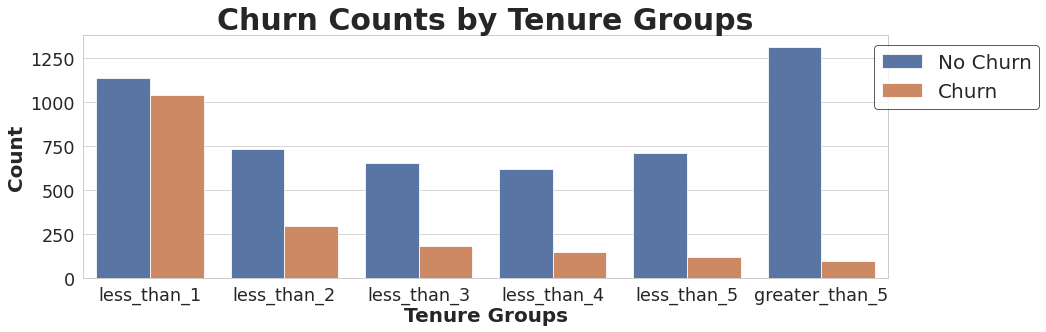

In [ ]:
tenure_group_counts(df_telco)

> Tenure: Customers with lower service tenures (newer clients) have a higher probability of churning than those with long tenures.

####Average MonthlyCharges by Tenure Group

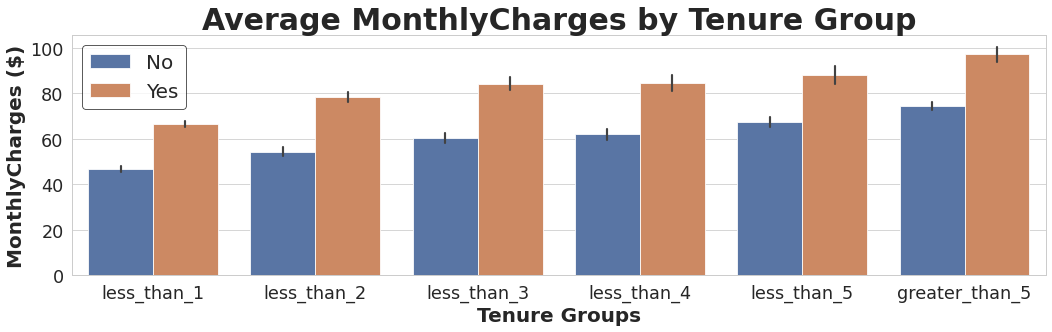

In [ ]:
plot_numerical_averages(df_telco, 'MonthlyCharges')


> Monthly Charges: Generally speaking, Likelihood of a customer churning increases as charges increase, and customers have the highest probability of churning when their monthly charges exceed 60 dollars. 

####Average TotalCharges by Tenure Group

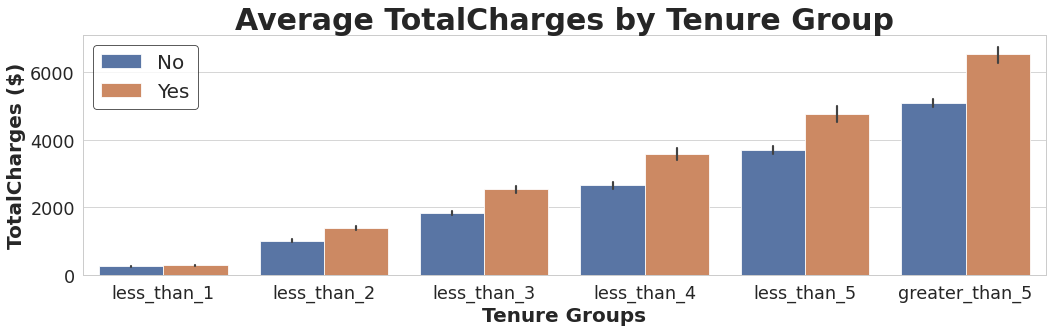

In [ ]:
plot_numerical_averages(df_telco, 'TotalCharges')

> Total Charges: Distributions mostly too general for impact of feature (Monthly is most likely more important)

###### function plot Categorical Features


In [ ]:
def plot_gender_dist(df):
    sns.set(style = 'whitegrid')
    sns.set_context('paper', font_scale = 2)
    fig = plt.figure(figsize = (30,10))
    
    plt.subplot(131)
    plt.pie(df.gender.value_counts(), labels = ['Male', 'Female'], autopct = '%.1f%%', radius = 1, textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Overall Data Gender Composition', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(132)
    a = sns.countplot(data = df, x = 'gender', hue = 'Churn')
    a.set_title('Gender Distribution by Churn', fontsize = 30, fontweight = 'bold')
    a.set_xlabel('Gender', fontweight = 'bold', fontsize = 20)
    a.set_ylabel('Count', fontweight = 'bold', fontsize = 20)
    
    plt.subplot(133)
    x = sns.violinplot('gender', 'MonthlyCharges', 'Churn', df, split = True)
    x.set_title('Violin Plot: Monthly Charges by Gender', fontsize = 30, fontweight = 'bold')
    x.set_xlabel('Gender', fontsize = 20, fontweight = 'bold')
    x.set_ylabel('Monthly Charges ($)', fontweight = 'bold', fontsize = 20)
    
    plt.tight_layout()
    
    
def plot_age_dist(df):
    
    fig = plt.figure(figsize = (30,10))
    
    plt.subplot(131)
    plt.pie(df.SeniorCitizen.value_counts(), labels = ['Non-Senior Citizen', 'Senior'], autopct = '%.1f%%', radius = 1, textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Age Composition of Overall Data', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(132)
    g = df.copy()
    g = g.groupby('SeniorCitizen')['Churn'].value_counts().to_frame()
    g = g.rename({'Churn':'pct_total'}, axis = 1).reset_index()
    g['pct_total'] = (g['pct_total']/len(df)) * 100
    t = sns.barplot('SeniorCitizen', y = 'pct_total', hue = 'Churn', data = g)
    t.set_title('Churn % by Age', fontsize = 30, fontweight = 'bold')
    t.set_xlabel('')
    t.set_ylabel('Percentage of Customers', fontsize = 20, fontweight = 'bold')
    t.set_xticklabels(labels = ['Non-Senior Citizen', 'Senior Citizen'], fontweight = 'bold', fontsize = 20)
    
    plt.subplot(133)
    x = sns.violinplot('SeniorCitizen', 'MonthlyCharges', 'Churn', df, split = True)
    x.set_title('Violin Plot: Monthly Charges by Age', fontsize = 30, fontweight = 'bold')
    x.set_xlabel('')
    x.set_ylabel('Monthly Charges ($)', fontsize = 20, fontweight = 'bold')
    x.set_xticklabels(labels = ['Non-Senior Citizen', 'Senior Citizen'], fontsize = 20, fontweight = 'bold')
    
    plt.tight_layout()
    
def plot_partner_dependents(df):
    
    fig = plt.figure(figsize = (25,25))
    x = df.copy()
    plt.subplot(321)
    plt.pie(df.Partner.value_counts(), labels = ['No Partner', 'Partner'], autopct = '%.1f%%', radius = 1, textprops = {'fontsize':20, 'fontweight':'bold'}, startangle = 90)
    plt.title('Partner Composition of Overall Data', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(322)
    plt.pie(df.Dependents.value_counts(), labels = ['No Dependents', 'Dependents'], autopct = '%.1f%%', radius = 1,  textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Dependent Composition of Overall Data', fontsize = 30, fontweight = 'bold')
    
    plt.subplot(323)
    x = df.copy()
    x = x.groupby('Partner')['Churn'].value_counts().to_frame()
    x = x.rename({'Churn':'pct_total'}, axis = 1).reset_index()
    x['pct_total'] = (x['pct_total']/len(df)) * 100
    u = sns.barplot('Partner', y = 'pct_total', hue = 'Churn', data = x)
    u.set_title('Churn % by Partner', fontweight = 'bold', fontsize = 30)
    u.set(xticklabels = ['No Partner', 'Partner'])
    u.set_xlabel('')
    u.set_ylabel('Percentage of Total', fontweight = 'bold', fontsize = 20)
    
    plt.subplot(324)
    y = df.copy()
    y = y.groupby('Dependents')['Churn'].value_counts().to_frame()
    y = y.rename({'Churn':'pct_total'}, axis = 1).reset_index()
    y['pct_total'] = (y['pct_total']/len(df)) * 100
    v = sns.barplot('Dependents', y = 'pct_total', hue = 'Churn', data = y)
    v.set_title('Churn % by Dependents', fontweight = 'bold', fontsize = 30)
    v.set(xticklabels = ['No Dependents', 'Dependents'])
    v.set_xlabel('')
    v.set_ylabel('')
    
    plt.subplot(325)
    y = sns.violinplot('Partner', 'MonthlyCharges', 'Churn', df, split = True)
    y.set_title('Violin Plot: Monthly Charges by Partner', fontweight = 'bold', fontsize = 30)
    y.set_xticklabels(['Partner', 'No Partner'])
    y.set_xlabel('')
    
    plt.subplot(326)
    z = sns.violinplot('Dependents', 'MonthlyCharges', 'Churn', df, split = True)
    z.set_title('Violin Plot: Monthly Charges by Dependents', fontweight = 'bold', fontsize = 30)
    z.set_xticklabels(['No Dependents', 'Dependents'])
    z.set_xlabel('')
    z.set_ylabel('Monthly Charges', fontweight = 'bold', fontsize = 20)

def plot_services_phone(df):
    
    phone_only = df[(df.PhoneService == 'Yes') & (df.InternetService == 'No')]
    
    fig = plt.figure(figsize = (35, 20))

    plt.subplot(231)
    plt.pie(phone_only.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', radius = 1, textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customer Churn - Phone Service Only', fontsize = 30, fontweight = 'bold')
    
    plt.subplot(232)
    z = df.copy()
    z = z.groupby('PhoneService')['Churn'].value_counts().to_frame()
    z = z.rename({'Churn':'pct_total'}, axis = 1).reset_index()
    z['pct_total'] = (z['pct_total']/len(df)) * 100
    a = sns.barplot('PhoneService', y = 'pct_total', hue = 'Churn', data = z)
    a.set_title('% Churn by Phone Service', fontsize = 30, fontweight = 'bold')
    a.set(xticklabels = ['No Phone', 'Phone'])
    a.set_xlabel('')
    a.set_ylabel('% of Customers', fontweight = 'bold')
    
    
    plt.subplot(233)
    v1 = sns.violinplot('PhoneService', 'MonthlyCharges', 'Churn', df, split = True)
    v1.set_title('Violin Plot: Monthly Charges by Phone Service', fontsize = 30, fontweight = 'bold')
    v1.set_xlabel('')
    v1.set_ylabel('Monthly Charges ($)', fontsize = 20, fontweight = 'bold')
    v1.set(xticklabels = ['No Phone', 'Phone'])
    
    plt.subplot(234)
    plt.pie(df.MultipleLines.value_counts(), labels = ['Singular Line', 'Multiple Lines', 'No Phone Service'], autopct = '%.1f%%', radius = 1, textprops = {'fontweight':'bold', 'fontsize': 20}, startangle = 180)
    plt.title('Customer Churn - Qty. of Lines', fontsize = 30, fontweight = 'bold')
    

    
    plt.subplot(235)
    bb = df.copy()
    bb = bb.groupby('MultipleLines')['Churn'].value_counts().to_frame()
    bb = bb.rename({'Churn':'pct_total'}, axis = 1).reset_index()
    bb['pct_total'] = (bb['pct_total']/len(df)) * 100
    c = sns.barplot('MultipleLines', y = 'pct_total', hue = 'Churn', data = bb)
    c.set(xticklabels = ['Singular Line', 'No Phone Service', 'Multiple Lines'])
    c.set_title('')
    c.set_xlabel('')
    c.set_ylabel('% of Customers', fontweight = 'bold', fontsize = 20)
    c.set_title('% Churn by Phone Line Qty.', fontsize = 30, fontweight = 'bold')
    
    plt.subplot(236)
    v = sns.violinplot('MultipleLines', 'MonthlyCharges', 'Churn', df, split = True)
    v.set_title('Violin Plot: Monthly Charges by Line Quantity', fontweight = 'bold', fontsize = 30)
    v.set_xlabel('')
    v.set_ylabel('Monthly Charges ($)', fontweight = 'bold')
    v.set(xticklabels = ['No Phone Service', 'Singular Line', 'Multiple Lines'])
    
    fig.suptitle('Phone Services -  Line Quantity', fontweight = 'bold', fontsize = 40)
    
    
def plot_internet_services(df):
    
    copy = df.copy()
    fig = plt.figure(figsize = (30, 10))

    plt.subplot(131)
    plt.pie(copy.InternetService.value_counts(), labels = ['Fiber Optic', 'DSL', 'No Internet'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight': 'bold'}, startangle = 180)
    plt.title('Internet Service Composition of Customers', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(132)
    copy = copy.groupby('InternetService')['Churn'].value_counts().to_frame()
    copy = copy.rename({'Churn':'pct_total'}, axis = 1).reset_index()
    copy['pct_total'] = (copy['pct_total']/len(df)) * 100
    d = sns.barplot('InternetService', y = 'pct_total', hue = 'Churn', data = copy)
    d.set_title('% Churn by Internet Service', fontweight= 'bold', fontsize = 30)
    d.set_xlabel('')
    d.set_ylabel('% of Customers', fontweight = 'bold', fontsize = 20)
    d.set(xticklabels = ['DSL', 'Fiber Optic', 'No Internet Service'])
    
    plt.subplot(133)
    e = sns.violinplot('InternetService', 'MonthlyCharges', 'Churn', df, split = True)
    e.set_title('Violin Plot: Monthly Charges by Internet Service', fontweight = 'bold', fontsize = 30)
    e.set_xlabel('')
    e.set(xticklabels = ['DSL', 'Fiber Optic', 'No Internet Service'])
    e.set_ylabel('Monthly Charges($)', fontweight = 'bold', fontsize = 30)

    fig.tight_layout()
    

def plot_services(df):
    copy = df[df.InternetService != 'No']
    
    fig = plt.figure(figsize = (40, 15))
    
    plt.subplot(261)
    plt.pie(copy.OnlineSecurity.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Online Security', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(262)
    plt.pie(copy.OnlineBackup.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Online Backup', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(263)
    plt.pie(copy.DeviceProtection.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Device Protection', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(264)
    plt.pie(copy.TechSupport.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Tech Support', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(265)
    plt.pie(copy.StreamingTV.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Streaming TV', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(266)
    plt.pie(copy.StreamingMovies.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Movie Streaming', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(267)
    copy1 = copy[copy.OnlineSecurity == 'Yes']
    plt.pie(copy1.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Online Security - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(268)
    copy2 = copy[copy.OnlineBackup == 'Yes']
    plt.pie(copy2.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Online Backup - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(269)
    copy3 = copy[copy.DeviceProtection == 'Yes']
    plt.pie(copy3.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Device Protection - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(2,6,10)
    copy4 = copy[copy.TechSupport == 'Yes']
    plt.pie(copy4.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Tech Support - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(2,6,11)
    copy5 = copy[copy.StreamingTV == 'Yes']
    plt.pie(copy5.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Streaming TV - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(2,6,12)
    copy6 = copy[copy.StreamingMovies == 'Yes']
    plt.pie(copy6.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Streaming Movies - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.tight_layout()
    
    
def plot_service_charges(df):
    
    fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (40, 10), sharex = True, sharey = True)
    
    copy1 = df[df.OnlineSecurity != 'No internet service']
    a = sns.violinplot('OnlineSecurity', 'MonthlyCharges', 'Churn', copy1, split = True, ax = axes[0])
    a.set_title('Online Security', fontsize = 30, fontweight = 'bold')
    a.set_xlabel('Has Service', fontweight = 'bold', fontsize = 20)
    a.set_ylabel('Monthly Charges ($)', fontweight = 'bold', fontsize = 20)
    a.set_yticklabels(a.get_yticks(), size = 25, weight = 'bold')
    a.legend(loc = 'upper left', )
    a.legend_.set_title('Churn', prop = {'size': 20, 'weight':'bold'})

    copy2 = df[df.OnlineBackup != 'No internet service']
    b = sns.violinplot('OnlineBackup', 'MonthlyCharges', 'Churn', copy2, split = True, ax = axes[1])
    b.set_title('Online Backup', fontweight = 'bold', fontsize = 30)
    b.set_xlabel('Has Service', fontweight = 'bold', fontsize = 20)
    b.set_ylabel('')
    b.legend_.remove()
    
    copy3 = df[df.DeviceProtection != 'No internet service']
    c = sns.violinplot('OnlineBackup', 'MonthlyCharges', 'Churn', copy3, split = True, ax = axes[2])
    c.set_title('Device Protection', fontweight = 'bold', fontsize = 30)
    c.set_xlabel('Has Service', fontweight = 'bold', fontsize = 20)
    c.set_ylabel('')
    c.legend_.remove()
    
    copy4 = df[df.TechSupport != 'No internet service']
    d = sns.violinplot('TechSupport', 'MonthlyCharges', 'Churn', copy3, split = True, ax = axes[3])
    d.set_title('Tech Support', fontsize = 30, fontweight = 'bold')
    d.set_xlabel('Has Service', fontsize = 20, fontweight = 'bold')
    d.set_ylabel('')
    d.legend_.remove()
    
    copy5 = df[df.StreamingTV != 'No internet service']
    e = sns.violinplot('StreamingTV', 'MonthlyCharges', 'Churn', copy4, split = True, ax = axes[4])
    e.set_title('Streaming TV', fontsize = 30, fontweight = 'bold')
    e.set_xlabel('Has Service', fontweight = 'bold', fontsize = 20)
    e.set_ylabel('')
    e.legend_.remove()
    
    copy5 = df[df.StreamingMovies != 'No internet service']
    f = sns.violinplot('StreamingMovies', 'MonthlyCharges', 'Churn', copy5, split = True, ax = axes[5])
    f.set_title('Streaming Movies', fontweight = 'bold', fontsize = 30)
    f.set_xlabel('Has Service', fontsize = 20, fontweight = 'bold')
    f.set_ylabel('')
    f.legend(loc = 'upper left')
    f.legend_.set_title('Churn', prop = {'size': 20, 'weight':'bold'})
    
    
def plot_contracts(df):
    
    copy = df.copy()
    
    plt.figure(figsize = (30, 10))
    
    plt.subplot(131)
    plt.pie(copy.Contract.value_counts(), labels = ['Monthly', '1-Year', '2-Year'], autopct = '%.1f%%', textprops = {'fontweight':'bold', 'fontsize': 20})
    plt.title('Customer Contract Composition', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(132)
    plt.title('Churn % by Contract Type', fontsize = 30, fontweight = 'bold')
    copy = copy.groupby('Contract')['Churn'].value_counts().to_frame()
    copy = copy.rename({'Churn':'pct_total'}, axis = 1).reset_index()
    copy['pct_total'] = (copy['pct_total']/len(df)) * 100
    a = sns.barplot('Contract', y = 'pct_total', hue = 'Churn', data = copy)
    a.set_title('% Churn - Contract Type', fontsize = 30, fontweight = 'bold')
    a.set(xticklabels = ['Monthly', '1-Year', '2-Year'])
    a.set_xlabel('')
    a.set_ylabel('% of Customers', fontweight = 'bold')
    
    plt.subplot(133)
    b = sns.violinplot('Contract', 'MonthlyCharges', 'Churn', df, split = True)
    b.set_title('Violin Plot: Monthly Charge - Contract Types', fontweight = 'bold', fontsize = 30)
    b.set_xlabel('')
    b.set_ylabel('Monthly Charges ($)', fontweight = 'bold', fontsize = 20)
    b.set(xticklabels = ['Monthly', '1-Year', '2-Year'])
    b.legend(loc = 'upper left')
    b.legend_.set_title('Churn', prop = {'weight':'bold', 'size':20})
    
def plot_paperless(df):
    
    copy = df.copy()
    
    plt.figure(figsize = (30, 10))
    
    plt.subplot(131)
    plt.pie(copy.PaperlessBilling.value_counts(), labels = ['Paperless', 'Not Paperless'], autopct = '%.1f%%', textprops = {'fontweight':'bold', 'fontsize': 20})
    plt.title('Customer Paperless Billing Composition', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(132)
    plt.title('Churn % by Billing Type', fontsize = 30, fontweight = 'bold')
    copy = copy.groupby('PaperlessBilling')['Churn'].value_counts().to_frame()
    copy = copy.rename({'Churn':'pct_total'}, axis = 1).reset_index()
    copy['pct_total'] = (copy['pct_total']/len(df)) * 100
    a = sns.barplot('PaperlessBilling', y = 'pct_total', hue = 'Churn', data = copy)
    a.set_title('% Churn - Paperless Billing', fontsize = 30, fontweight = 'bold')
    a.set(xticklabels = ['Paperless', 'Not Paperless'])
    a.set_xlabel('')
    a.set_ylabel('% of Customers', fontweight = 'bold')
    
    plt.subplot(133)
    b = sns.violinplot('PaperlessBilling', 'MonthlyCharges', 'Churn', df, split = True)
    b.set_title('Violin Plot: Monthly Charge - Contract Types', fontweight = 'bold', fontsize = 30)
    b.set_xlabel('')
    b.set_ylabel('Monthly Charges ($)', fontweight = 'bold', fontsize = 20)
    b.set(xticklabels = ['Paperless', 'Not Paperless'])
    b.legend(loc = 'upper right')
    b.legend_.set_title('Churn', prop = {'weight':'bold', 'size':20})
    
    plt.tight_layout()
    
    
def plot_pay_methods(df):
    
    copy = df.copy()
    
    plt.figure(figsize = (30, 10))
    
    plt.subplot(131)
    plt.pie(copy.PaymentMethod.value_counts(), labels = ['E-Check', 'Mail Check' , 'Bank Transfer (Auto)', 'Credit Card (Auto)'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'}, startangle = -90)
    plt.title('Customer Payment Method Composition', fontsize = 30, fontweight = 'bold')
    
    plt.subplot(132)
    copy = copy.groupby('PaymentMethod')['Churn'].value_counts().to_frame()
    copy = copy.rename({'Churn':'pct_total'}, axis = 1).reset_index()
    copy['pct_total'] = (copy['pct_total']/len(df))*100
    a = sns.barplot('PaymentMethod', 'pct_total', 'Churn', data = copy)
    a.set_title('% Churn - Payment Methods', fontsize = 30, fontweight = 'bold')
    a.set_xlabel('')
    a.set_ylabel('% of Customers', fontsize = 20, fontweight = 'bold')
    a.set_xticklabels(a.get_xticklabels(), rotation = 45)
    
    plt.subplot(133)
    c = sns.violinplot('PaymentMethod', 'MonthlyCharges', 'Churn', df, split = True)
    c.set_title('Violin Plot: Monthly Charge - Payment Methods', fontsize = 30, fontweight = 'bold')
    c.set_xlabel('')
    c.set_ylabel('Monthly Charges ($)', fontweight = 'bold', fontsize = 30)
    c.set_xticklabels(a.get_xticklabels(), rotation = 45)
    
    plt.tight_layout()

###Categorical Features

####Gender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


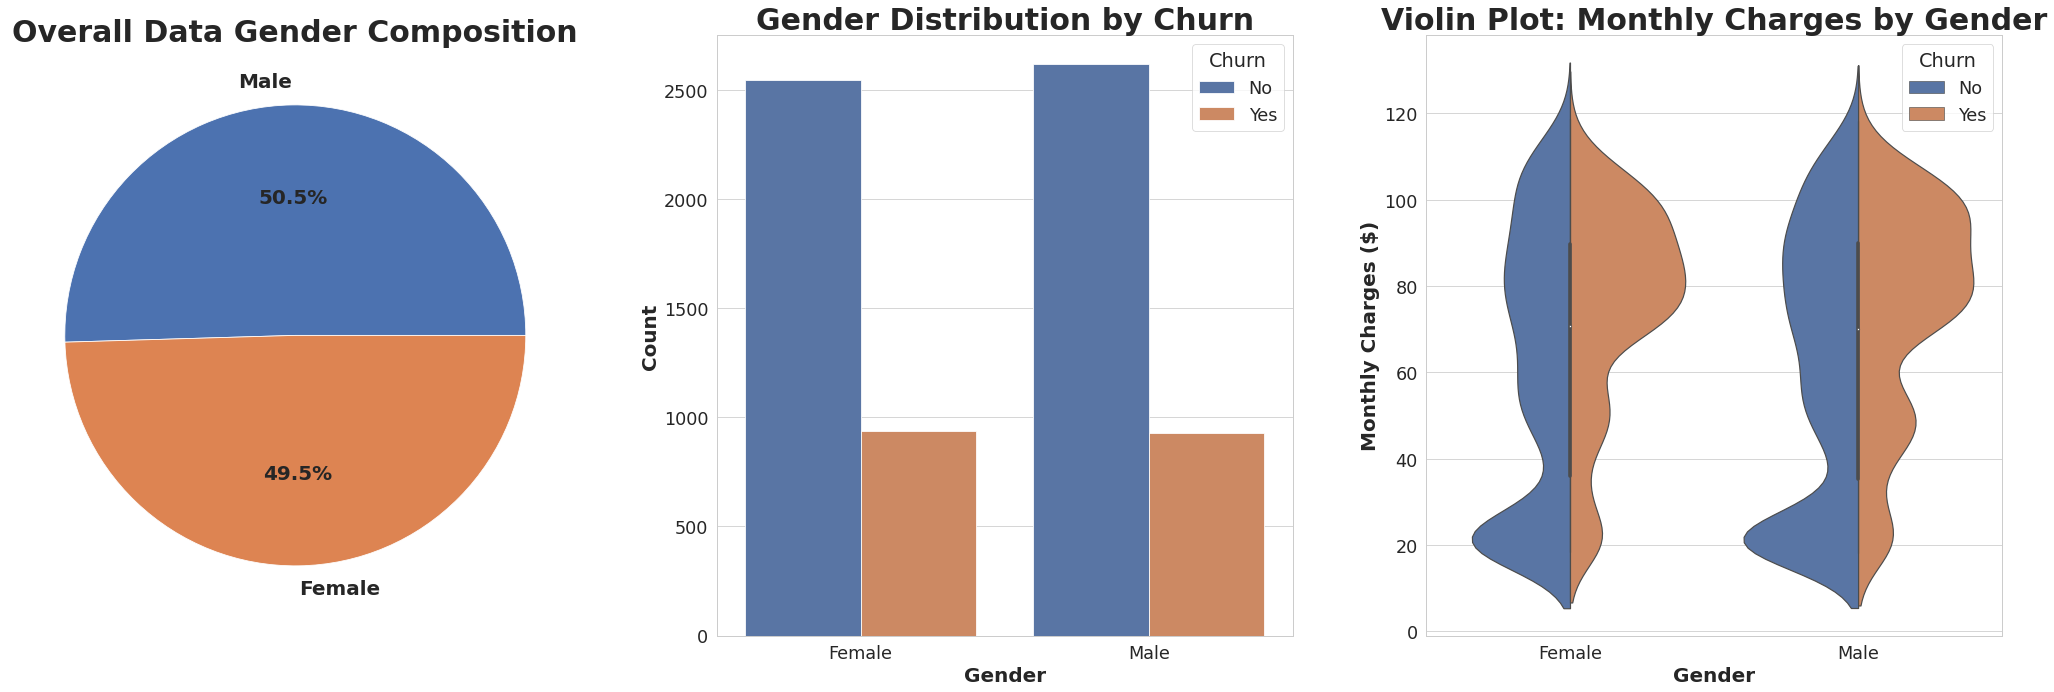

In [ ]:
plot_gender_dist(df_telco)



> Gender is equivalent in representation in our dataset and does not appear to be an indicator of Churn



####Age

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


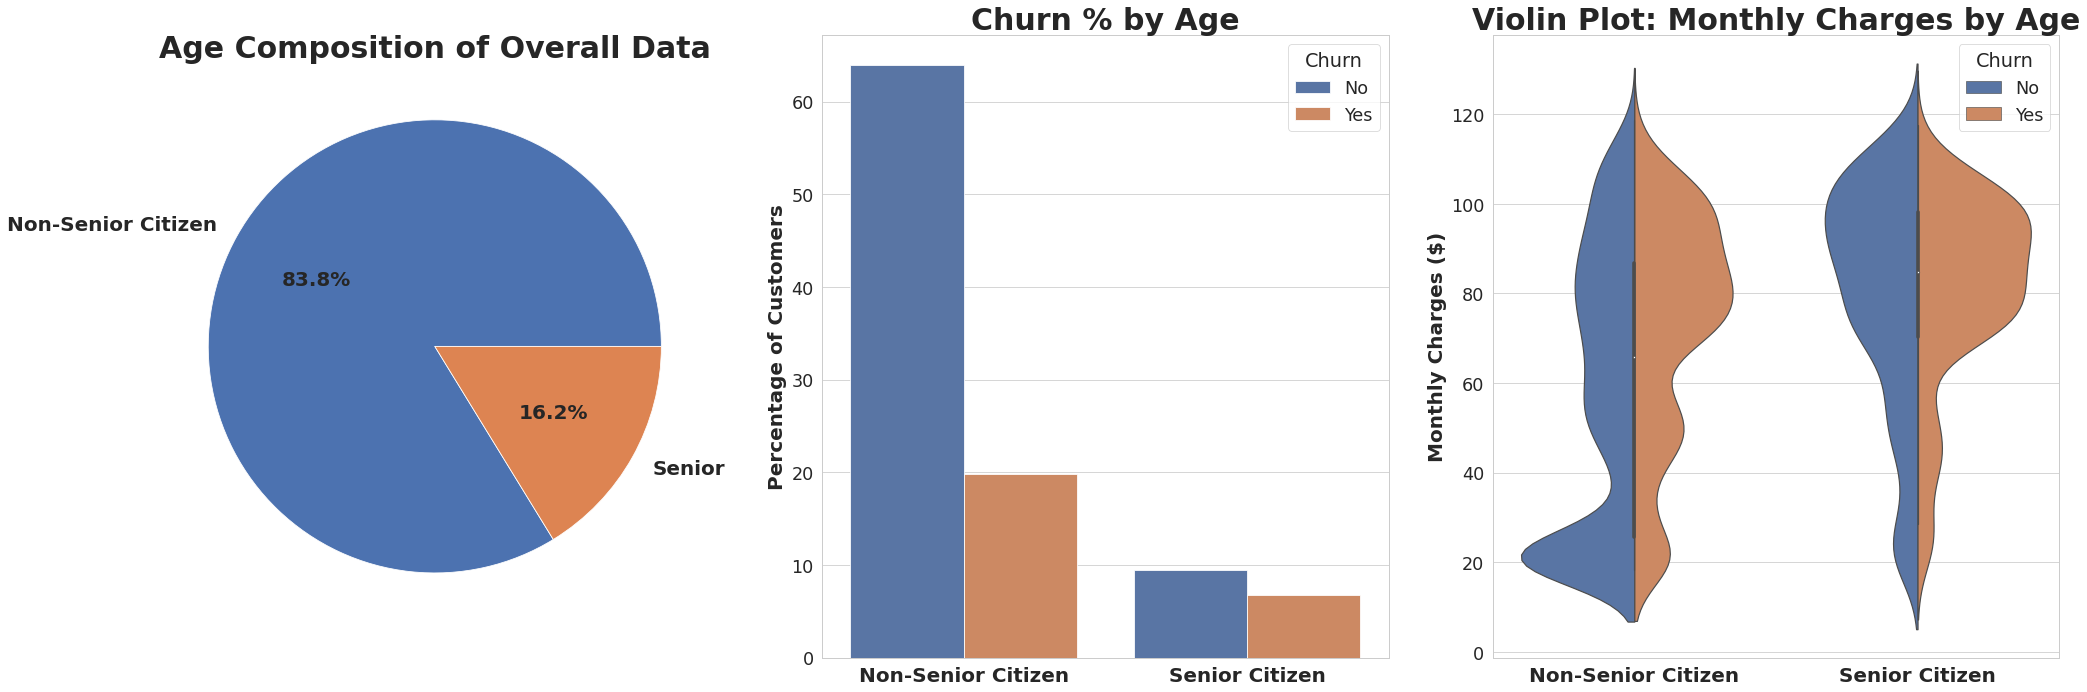

In [ ]:
plot_age_dist(df_telco)

> Our dataset has significantly less senior citizens than non-seniors (only 16% are senior)

> Overall, more non-senior citizens churn than senior citizens

> A higher proportion of senior citizens churn than non-senior citizens








> Indented block
> Indented block
> Indented block


In [ ]:
df_telco[df_telco.Churn == 'Yes'].Partner.value_counts()

No     1200
Yes     669
Name: Partner, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-pa

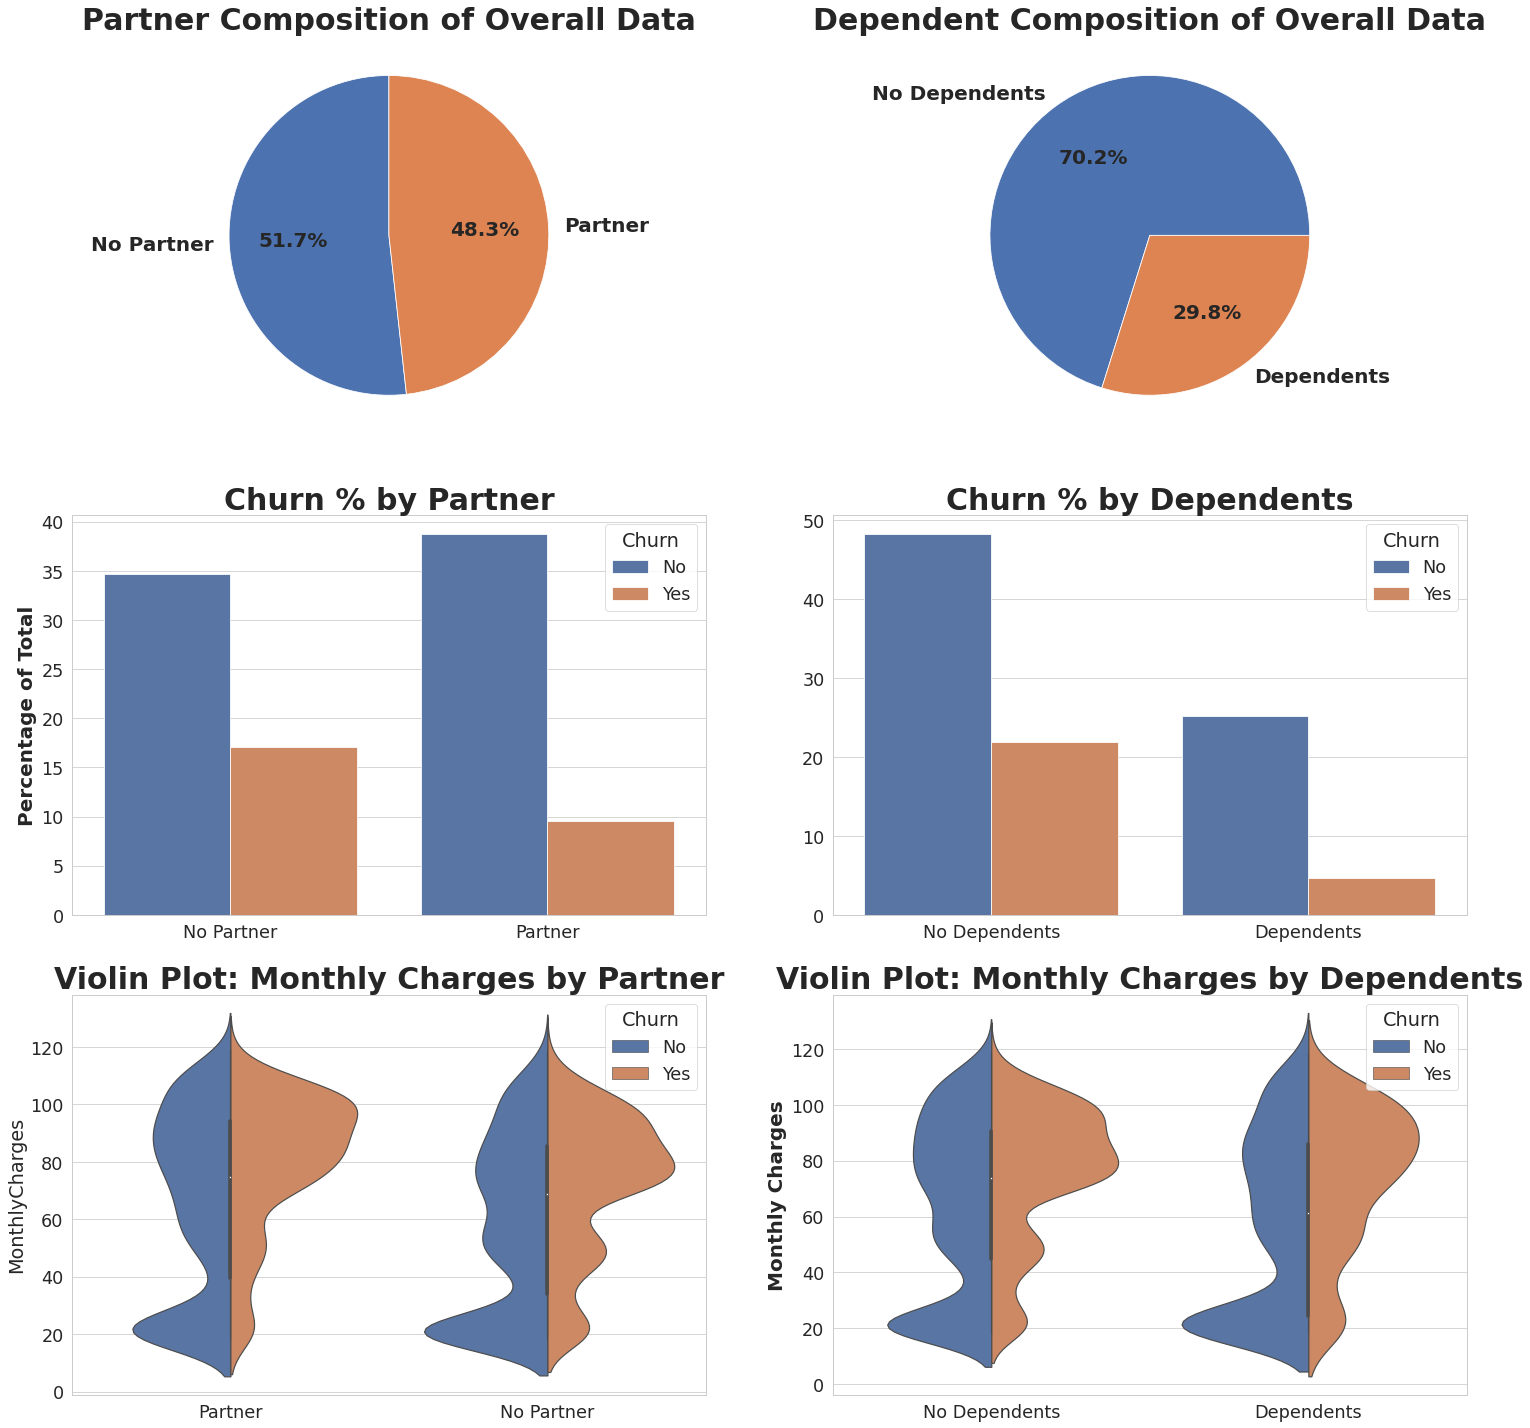

In [ ]:
plot_partner_dependents(df_telco)

> Overall, those without partners are more likely to churn than those with partners

> Customers without dependents are more likely to churn than those with dependents

> Monthly charges among those who churn and don’t churn are pretty similar for both partner values and both dependent values

####Phone Services & Line Quantities

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-pa

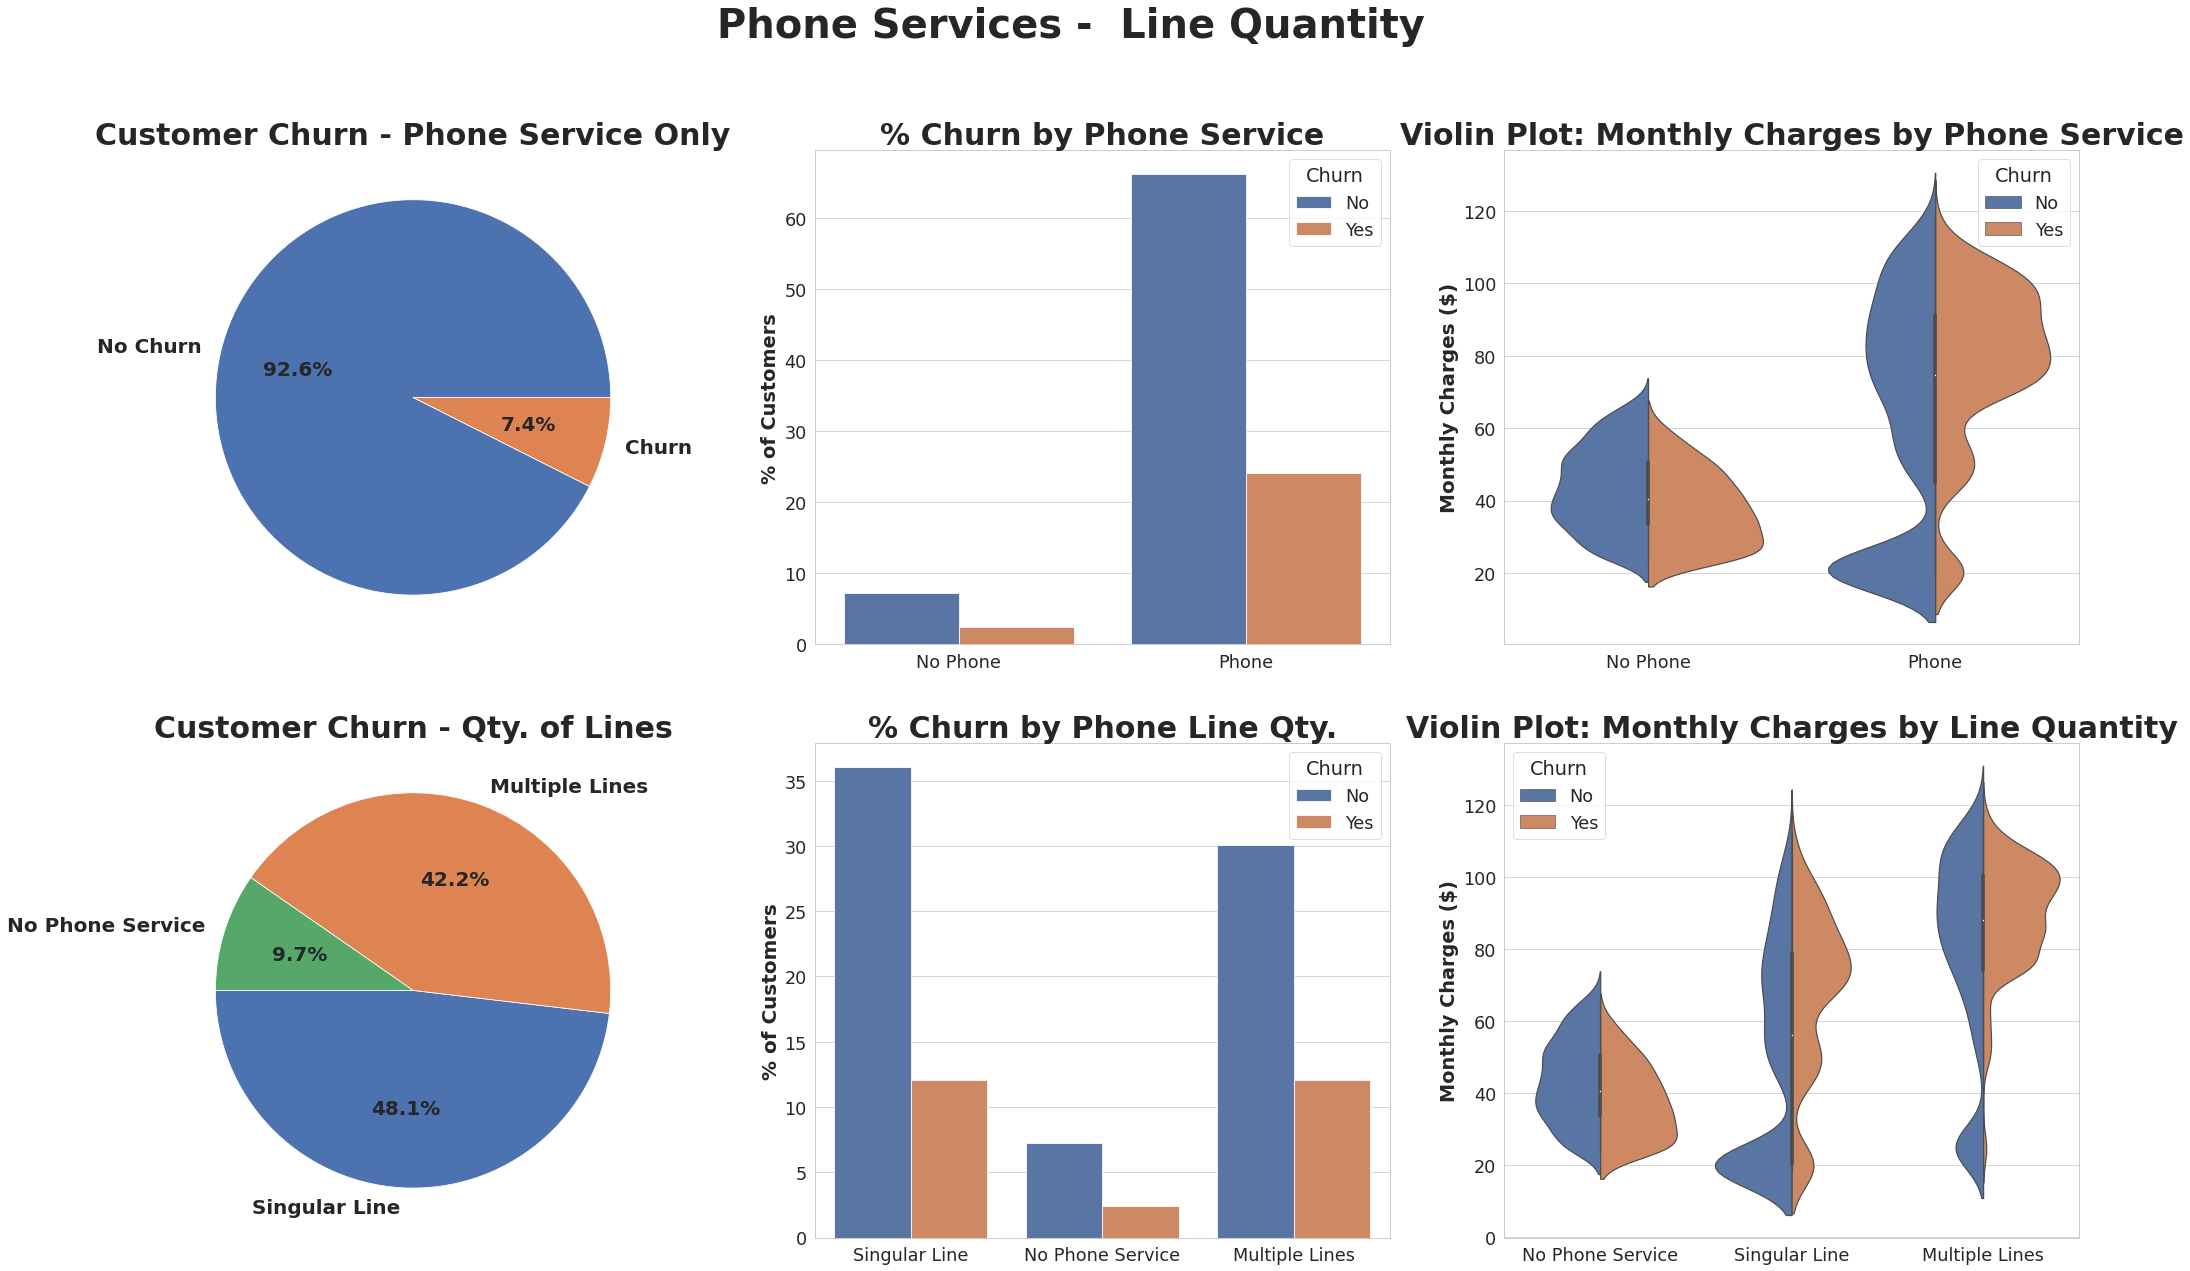

In [ ]:
plot_services_phone(df_telco)

> Significantly more customers with only phone service will not churn than those other customers

> People with only phone service churn ~25% of the time

> Customers with phone services only pay a higher average monthly charge

> Customers with multiple lines churn at approximately the same rate as those with a singular line

> Customers with multiple lines more frequently pay a higher monthly charge than those with singular phone lines

####Internet Service

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


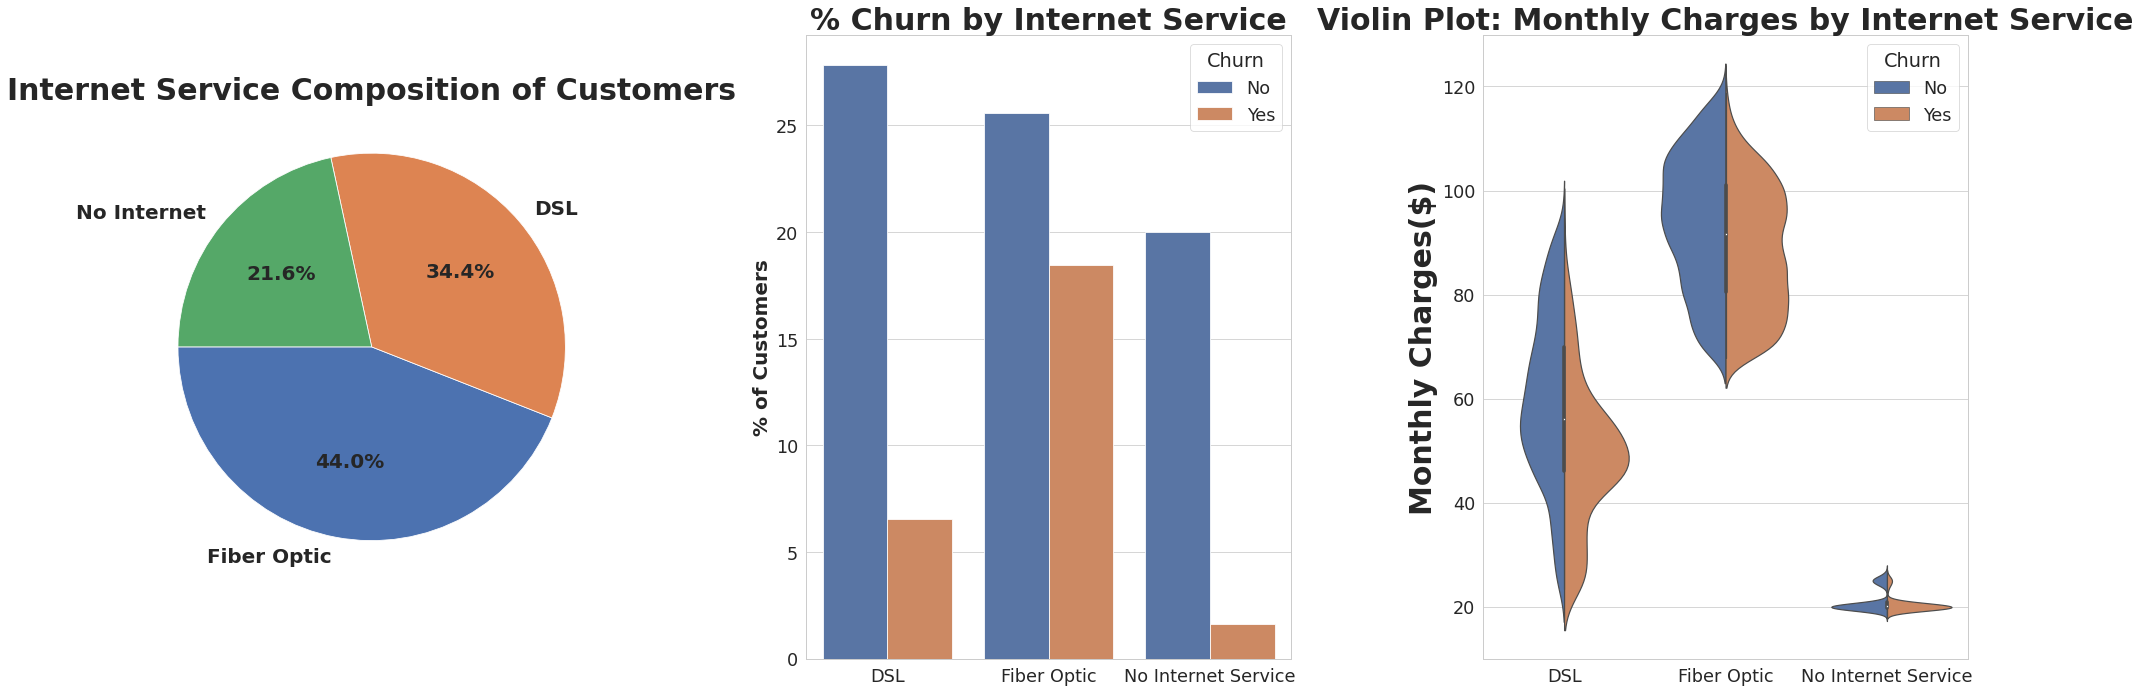

In [ ]:
plot_internet_services(df_telco)

> Fiber Optic is the most popular internet option

> Fiber Optic Internet Customers churn at significantly proportions than DSL or No Internet customers

> Fiber Optic is a significantly more expensive service, and customers churn slightly more than not when they have this service

> Customers with DSL are most likely to churn when their monthly charges are between $40 and $60.










####Add-On Services

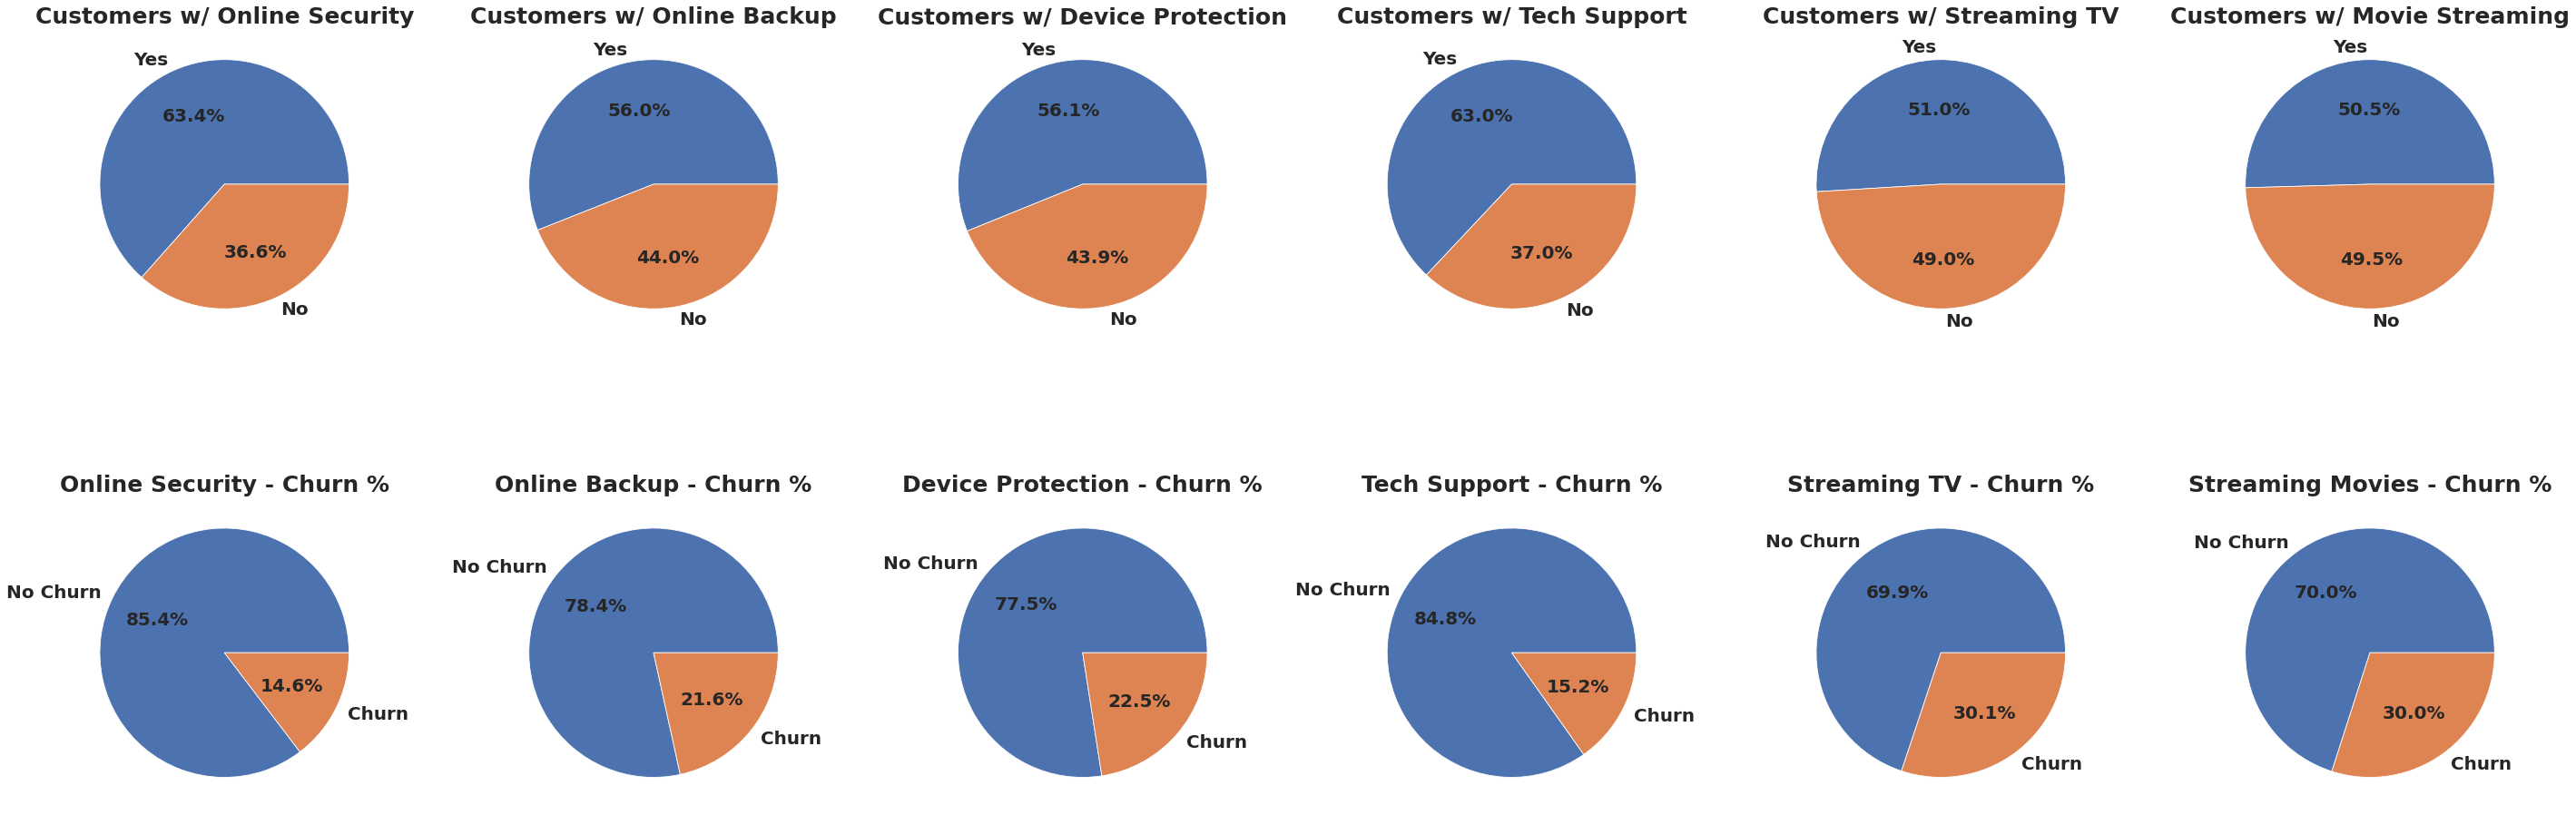

In [ ]:
plot_services(df_telco)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr

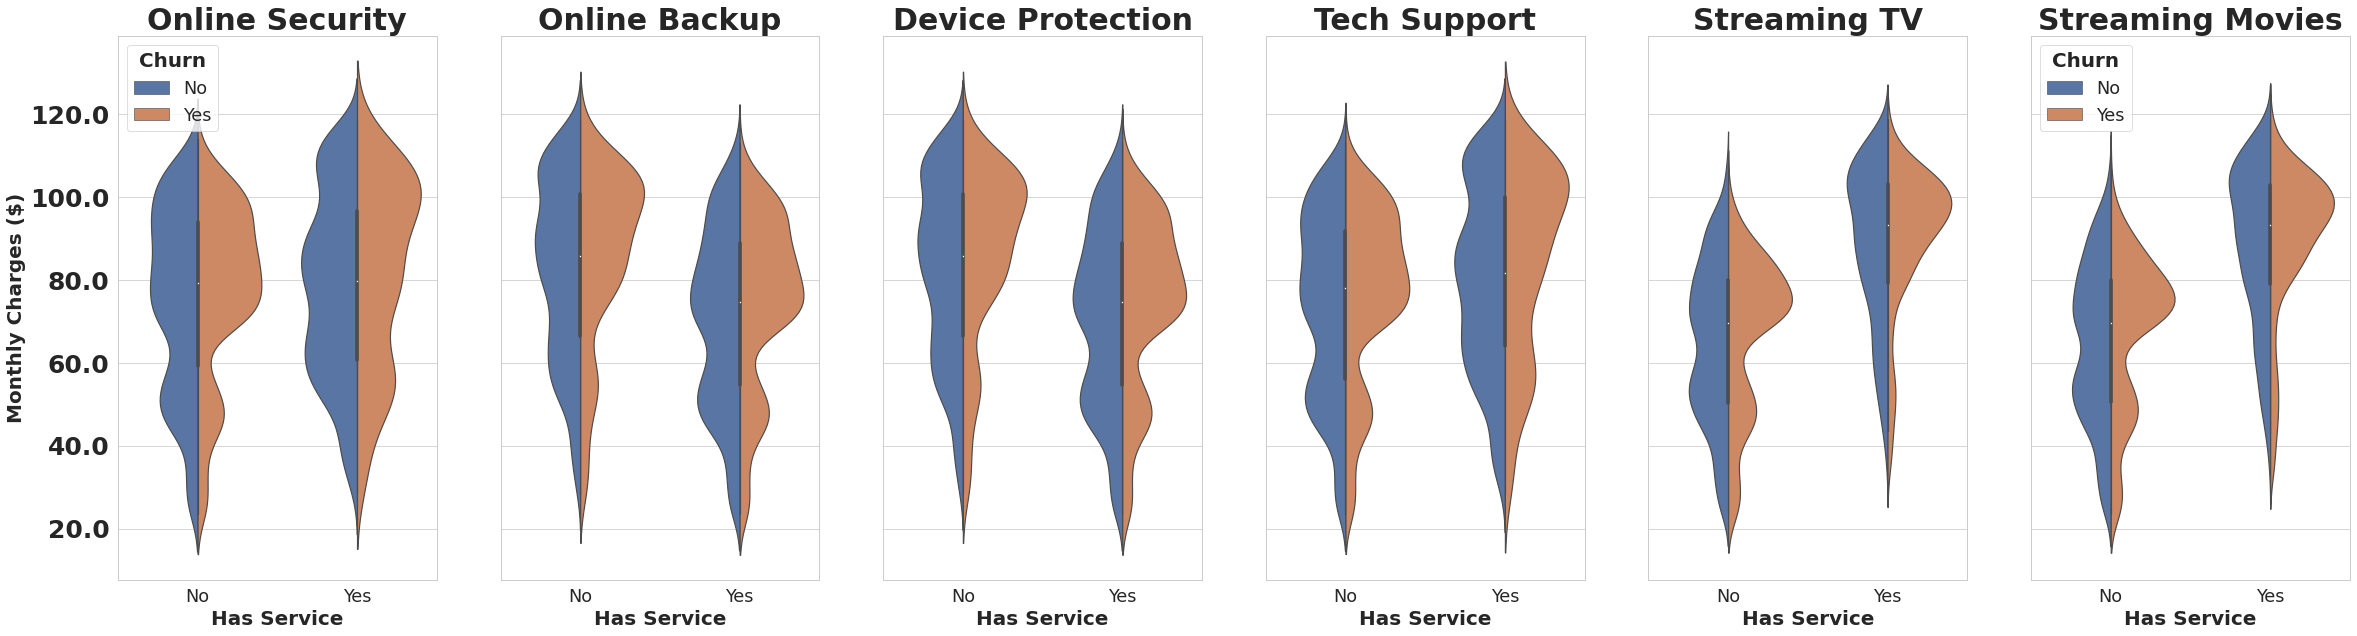

In [ ]:
plot_service_charges(df_telco)

> Customers with TV Streaming and/or Movie streaming services churn more than all other services.

> Churn for customers in most categories peaks around a monthly charge of $100

####Contracts

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


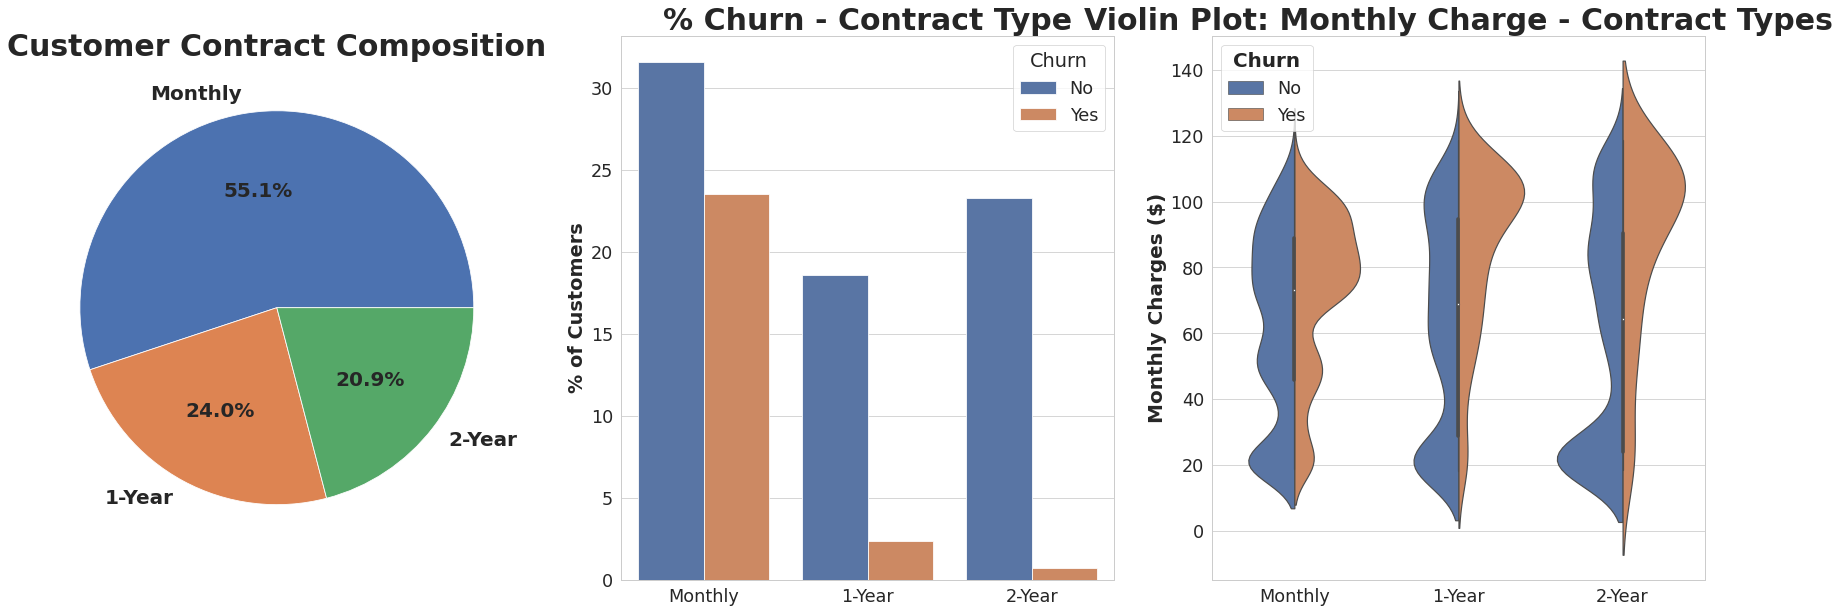

In [ ]:
plot_contracts(df_telco)






> More than half of customers use a monthly payment option

> Significantly more customers churn on monthly plans

> The longer the plan, the lower the churn rate

> Monthly charges are generally higher the longer the contract is

####Paperless Billing & Payment Methods

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


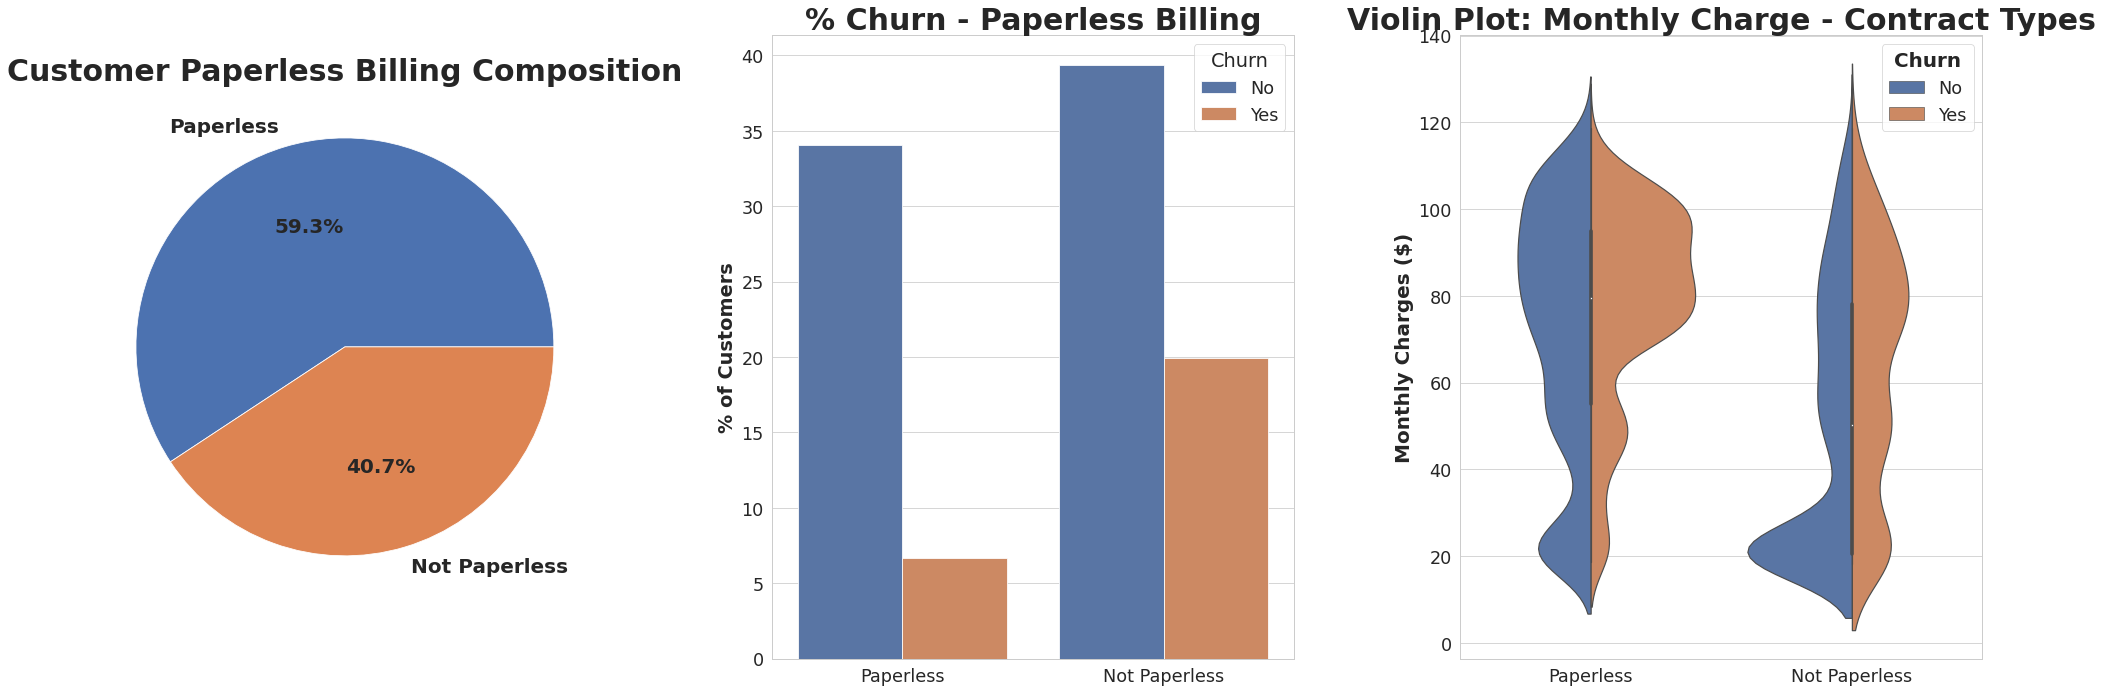

In [ ]:
plot_paperless(df_telco)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


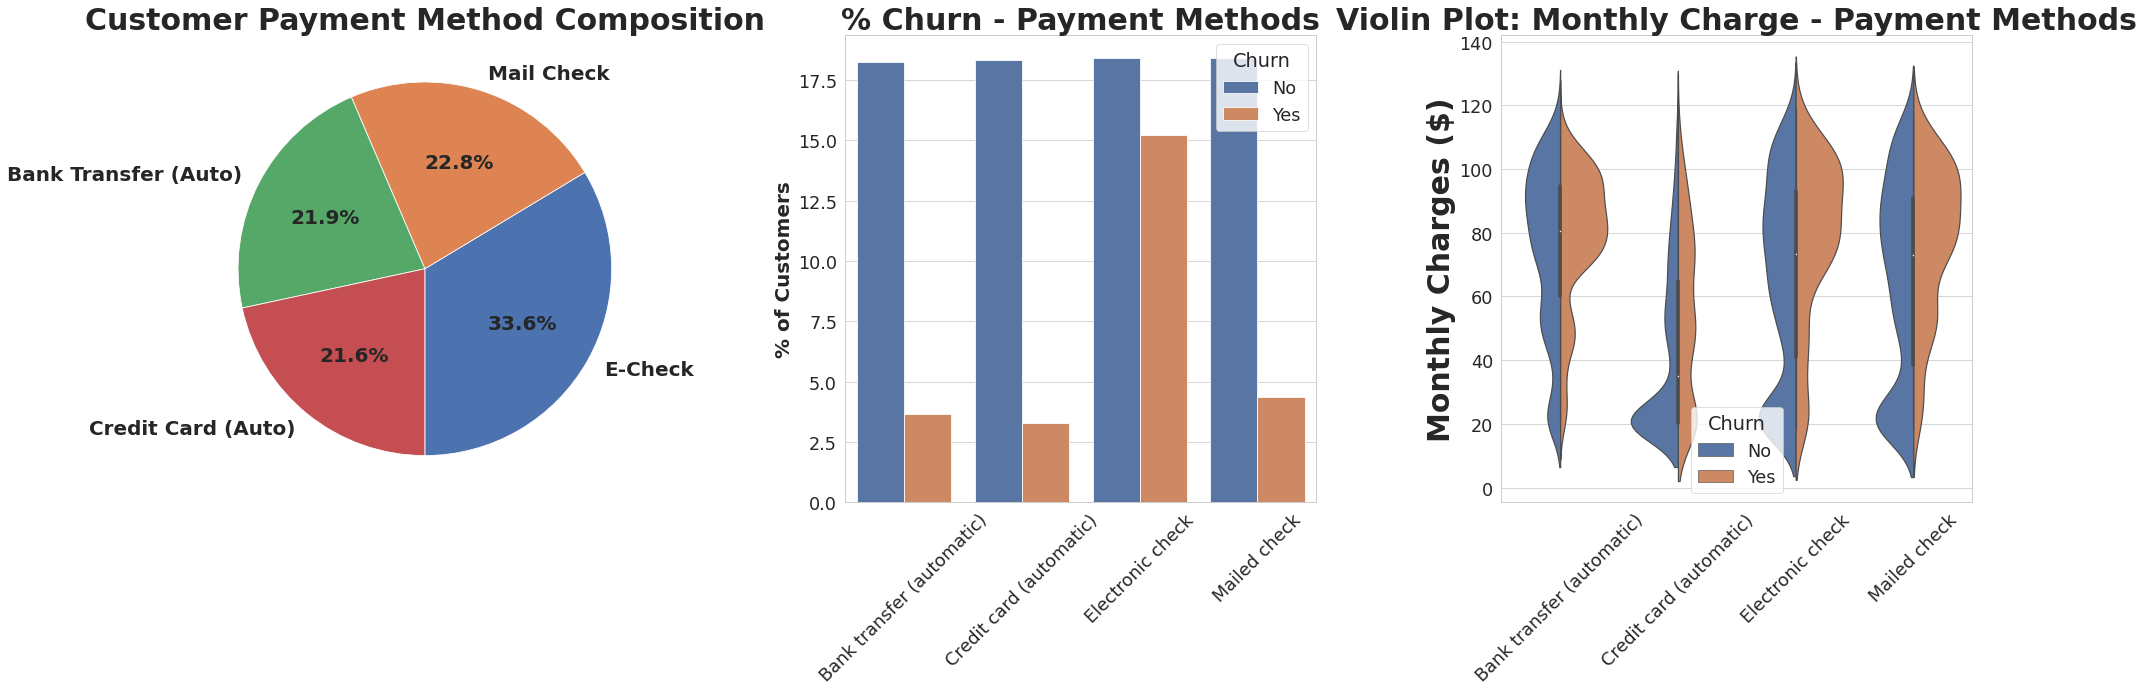

In [ ]:
plot_pay_methods(df_telco)

> Customers with non-paperless billing churn almost 15% more than paperless customers

> Paperless customers churn at similar rates as non-paperless customers when the monthly price is below 60 dollars, once above 60 more paperless customers churn than non-paperless

> Customers who pay with e-check churn more than 10% than customers with all other payment methods

> Customers who pay by credit card have consistent churn rates regardless of monthly charge, while customers paying by bank transfer, e-check, or mailed check all see an up-tick in churn once monthly charges rise above 60.

#3. Perform deep-dive exploration


## Ask minimum 2 questions
## At least 1 of them should involve group-by aggregation!

###1. How do payment method choices compare between Churn Customers and No Churn Customers?


In [ ]:
# payment method options Churn Customers
PaymentMethod = (df_telco[df_telco['Churn']=='Yes']
            .groupby('PaymentMethod')
            .agg(sum=('TotalCharges','sum'))
            .sort_values('sum',ascending=False)
            .reset_index()
            .head()
            )
PaymentMethod

,PaymentMethod,sum
0,Electronic check,1567576.40
1,Bank transfer (automatic),585611.75
2,Credit card (automatic),545259.80
3,Mailed check,164478.95


In [ ]:
#payment method options No Churn Customers
PaymentMethod2 = (df_telco[df_telco['Churn']=='No']
            .groupby('PaymentMethod')
            .agg(sum2=('TotalCharges','sum'))
            .sort_values('sum2',ascending=False)
            .reset_index()
            .head()
            )
PaymentMethod2

,PaymentMethod,sum2
0,Bank transfer (automatic),4162668.15
1,Credit card (automatic),4126333.55
2,Electronic check,3377326.85
3,Mailed check,1526913.25


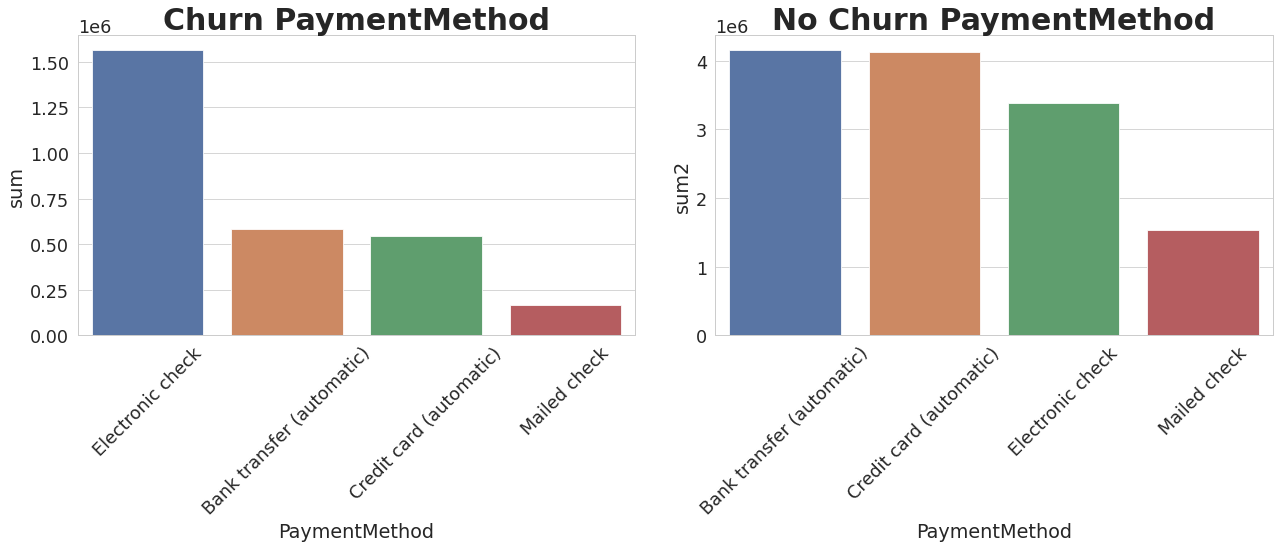

In [ ]:
sns.set(style = 'whitegrid')
sns.set_context('paper', font_scale = 2)
fig = plt.figure(figsize = (18, 8))

plt.subplot(121)
sns.barplot(data=PaymentMethod, x='PaymentMethod', y='sum')
plt.xticks(rotation=45)
plt.title('Churn PaymentMethod', fontsize = 30, fontweight = 'bold')

plt.subplot(122)
sns.barplot(data=PaymentMethod2, x='PaymentMethod', y='sum2')
plt.xticks(rotation=45)
plt.title('No Churn PaymentMethod', fontsize = 30, fontweight = 'bold')
plt.tight_layout()

> Electronic Check is preferred by Churn Customers

> Bank transfer (automatic) is preferred by No Churn customers

###2. How do contract options compare between Churn Customers and No Churn Customers?

In [ ]:
# contract options Churn Customers
Contract = (df_telco[df_telco['Churn']=='Yes']
            .groupby('Contract')
            .agg(sum=('TotalCharges','sum'))
            .sort_values('sum',ascending=False)
            .reset_index()
            .head()
            )
Contract

,Contract,sum
0,Month-to-month,1927182.25
1,One year,674991.20
2,Two year,260753.45


In [ ]:
# contract options No Churn Customers
Contract2 = (df_telco[df_telco['Churn']=='No']
            .groupby('Contract')
            .agg(sum2=('TotalCharges','sum'))
            .sort_values('sum2',ascending=False)
            .reset_index()
            .head()
            )
Contract2

,Contract,sum2
0,Two year,6022500.25
1,One year,3792062.30
2,Month-to-month,3378679.25


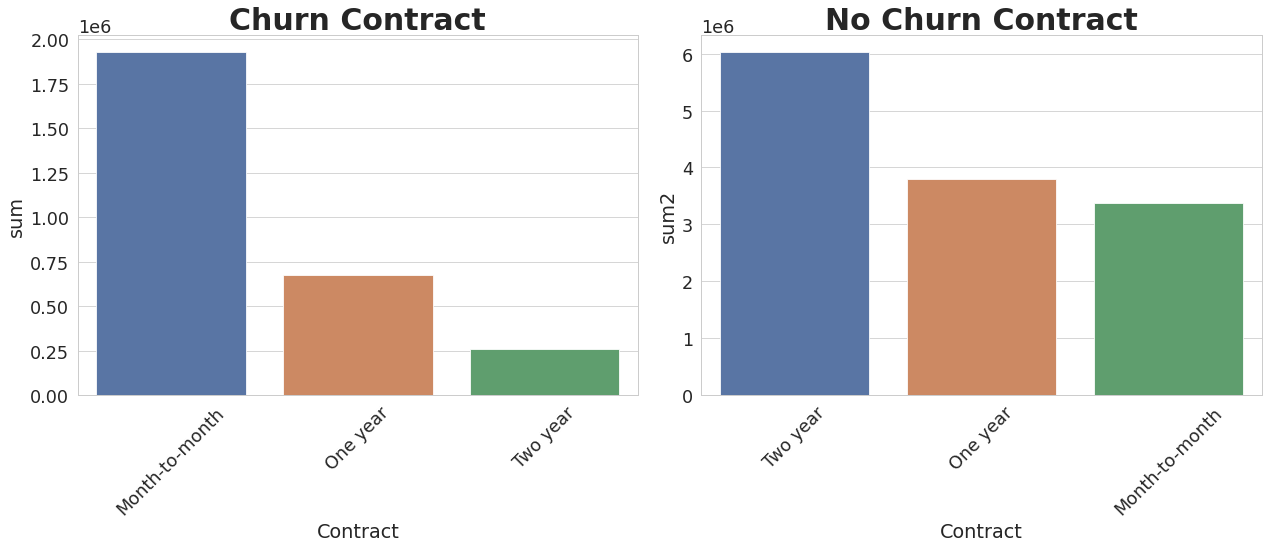

In [ ]:
sns.set(style = 'whitegrid')
sns.set_context('paper', font_scale = 2)
fig = plt.figure(figsize = (18, 8))

plt.subplot(121)
sns.barplot(data=Contract, x='Contract', y='sum')
plt.xticks(rotation=45)
plt.title('Churn Contract', fontsize = 30, fontweight = 'bold')

plt.subplot(122)
sns.barplot(data=Contract2, x='Contract', y='sum2')
plt.xticks(rotation=45)
plt.title('No Churn Contract', fontsize = 30, fontweight = 'bold')
plt.tight_layout()

> Month-to-month contracts are preferred by Churn Customers

> Two year contracts are preferred by No Churn customers